# Comparaison **scientifique** de 2 modèles (test set)
Ce notebook génère des graphiques sobres et reproductibles pour comparer deux CSV de résultats (A vs B).

In [1]:

# === CONFIGURATION ===
CSV_A = "baseline.csv"    # ex: "baseline_summary.csv"
CSV_B = "aug.csv"    # ex: "augmentation_summary.csv"
LABEL_A = "Baseline"
LABEL_B = "Augmentation"

SOURCE_ORDER = [
    "TestSet::dataset::datamatrix140",
    "TestSet::dataset::datamatrixfit",
    "TestSet::dataset::dmcode",
    "TestSet::dataset::implementacao",
    "TestSet::dataset::pcbdataset",
    "TestSet::dataset::qrv2",
    "TestSet::dataset::real2dcodes",
    "TestSet::dataset::recntagledmtest",
    "TestSet::global::global",
]

METRICS = [
    "map50_95_mean",
    "map50_mean",
    "map75_mean",
    "precision_mean",
    "recall_mean",
    "f1_mean",
]

OUTDIR = "figures_scientific"

import os, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import MultipleLocator

os.makedirs(OUTDIR, exist_ok=True)

plt.rcParams.update({
    "figure.dpi": 160,
    "savefig.dpi": 300,
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "font.family": "serif",
    "axes.spines.top": False,
    "axes.spines.right": False,
})

def autodetect_csvs():
    cands = [p for p in os.listdir('.') if p.endswith('.csv')]
    if len(cands) == 2:
        return cands[0], cands[1]
    return None, None

if not CSV_A or not CSV_B:
    a, b = autodetect_csvs()
    if a and b:
        CSV_A, CSV_B = a, b

print("CSV_A:", CSV_A)
print("CSV_B:", CSV_B)
assert CSV_A and CSV_B and Path(CSV_A).exists() and Path(CSV_B).exists(),     "Définissez CSV_A/CSV_B ou déposez exactement deux CSV dans ce dossier."


CSV_A: baseline.csv
CSV_B: aug.csv


In [7]:

# === CHARGEMENT & PRÉPARATION ===
dfA = pd.read_csv(CSV_A); dfA.columns = [c.strip() for c in dfA.columns]
dfB = pd.read_csv(CSV_B); dfB.columns = [c.strip() for c in dfB.columns]

base_keep = ["source"] + METRICS
missingA = [c for c in base_keep if c not in dfA.columns]
missingB = [c for c in base_keep if c not in dfB.columns]
assert not missingA, f"Colonnes manquantes dans CSV_A: {missingA}"
assert not missingB, f"Colonnes manquantes dans CSV_B: {missingB}"

std_cols = [m.replace("_mean", "_std") for m in METRICS]
extraA = [c for c in std_cols if c in dfA.columns]
extraB = [c for c in std_cols if c in dfB.columns]

dfA = dfA[["source"] + METRICS + extraA]
dfB = dfB[["source"] + METRICS + extraB]

def clean_sources(df):
    df = df[df["source"].isin(SOURCE_ORDER)].copy()
    df["__ord__"] = df["source"].apply(lambda s: SOURCE_ORDER.index(s))
    df.sort_values("__ord__", inplace=True)
    return df.drop(columns="__ord__")

dfA = clean_sources(dfA)
dfB = clean_sources(dfB)

df = dfA.merge(dfB, on="source", how="inner", suffixes=("_A", "_B"))
assert not df.empty, "Aucune source commune entre les deux CSV."

def short_name(s):
    if s == "TestSet::global::global":
        return "global"
    return s.replace("TestSet::dataset::","").replace("TestSet::global::","global")
df["short"] = df["source"].apply(short_name)

df


,source,map50_95_mean_A,map50_mean_A,map75_mean_A,precision_mean_A,recall_mean_A,f1_mean_A,map50_95_std_A,map50_std_A,map75_std_A,...,precision_mean_B,recall_mean_B,f1_mean_B,map50_95_std_B,map50_std_B,map75_std_B,precision_std_B,recall_std_B,f1_std_B,short
0,TestSet::dataset::datamatrix140,0.301168,0.666067,0.219936,0.869323,0.494810,0.630656,NaN,NaN,NaN,...,0.842951,0.778677,0.809541,NaN,NaN,NaN,NaN,NaN,NaN,datamatrix140
1,TestSet::dataset::datamatrixfit,0.315047,0.772674,0.191615,0.822387,0.678571,0.743589,NaN,NaN,NaN,...,0.790909,0.621429,0.696000,NaN,NaN,NaN,NaN,NaN,NaN,datamatrixfit
2,TestSet::dataset::dmcode,0.515870,0.714323,0.612205,0.809061,0.580046,0.675676,NaN,NaN,NaN,...,0.946923,0.819026,0.878343,NaN,NaN,NaN,NaN,NaN,NaN,dmcode
3,TestSet::dataset::implementacao,0.519038,0.846854,0.569003,0.946974,0.754655,0.839947,NaN,NaN,NaN,...,0.989141,0.830986,0.903192,NaN,NaN,NaN,NaN,NaN,NaN,implementacao
4,TestSet::dataset::pcbdataset,0.173239,0.371734,0.064460,0.416667,0.483871,0.447761,NaN,NaN,NaN,...,0.920000,0.741935,0.821429,NaN,NaN,NaN,NaN,NaN,NaN,pcbdataset
5,TestSet::dataset::qrv2,0.562176,0.797914,0.639105,0.774618,0.755300,0.764837,NaN,NaN,NaN,...,0.980166,0.938604,0.958935,NaN,NaN,NaN,NaN,NaN,NaN,qrv2
6,TestSet::dataset::real2dcodes,0.571226,0.893119,0.625202,0.889563,0.810259,0.848061,NaN,NaN,NaN,...,0.990659,0.931953,0.960409,NaN,NaN,NaN,NaN,NaN,NaN,real2dcodes
7,TestSet::dataset::recntagledmtest,0.326815,0.917660,0.090147,0.874173,0.899329,0.886572,NaN,NaN,NaN,...,0.811142,0.939597,0.870657,NaN,NaN,NaN,NaN,NaN,NaN,recntagledmtest
8,TestSet::global::global,0.328704,0.684538,0.256489,0.826986,0.551147,0.661461,NaN,NaN,NaN,...,0.843395,0.803917,0.823183,NaN,NaN,NaN,NaN,NaN,NaN,global


In [8]:

# === OUTILS DE PLOT ===
def setup_axes(ax, ylabel="Score", y0=0.0, y1=1.0, ymajor=0.1, yminor=0.05):
    ax.set_ylim(y0, y1)
    ax.set_ylabel(ylabel)
    ax.yaxis.set_major_locator(MultipleLocator(ymajor))
    ax.yaxis.set_minor_locator(MultipleLocator(yminor))
    ax.grid(True, which="major", linewidth=0.6, alpha=0.25)
    ax.grid(True, which="minor", linewidth=0.4, alpha=0.15)

def savefig(fig, basename):
    png = Path(OUTDIR) / f"{basename}.png"
    pdf = Path(OUTDIR) / f"{basename}.pdf"
    fig.tight_layout()
    fig.savefig(png, bbox_inches="tight")
    fig.savefig(pdf, bbox_inches="tight")
    plt.show()
    print("Saved:", png, "|", pdf)

def errpair(row, metric, suffix):
    m = row[f"{metric}_{suffix}"]
    s_col = f"{metric.replace('_mean','_std')}_{suffix}"
    if s_col in row and pd.notnull(row[s_col]):
        return m, row[s_col]
    return m, None

def draw_bars_with_optional_error(ax, labels, valsA, valsB, errsA, errsB, labelA, labelB):
    import numpy as np
    x = np.arange(len(labels))
    width = 0.38
    ax.bar(x - width/2, valsA, width, yerr=errsA, capsize=3, label=labelA)
    ax.bar(x + width/2, valsB, width, yerr=errsB, capsize=3, label=labelB)
    ax.set_xticks(x, labels, rotation=30, ha="right")
    ax.legend(frameon=False)


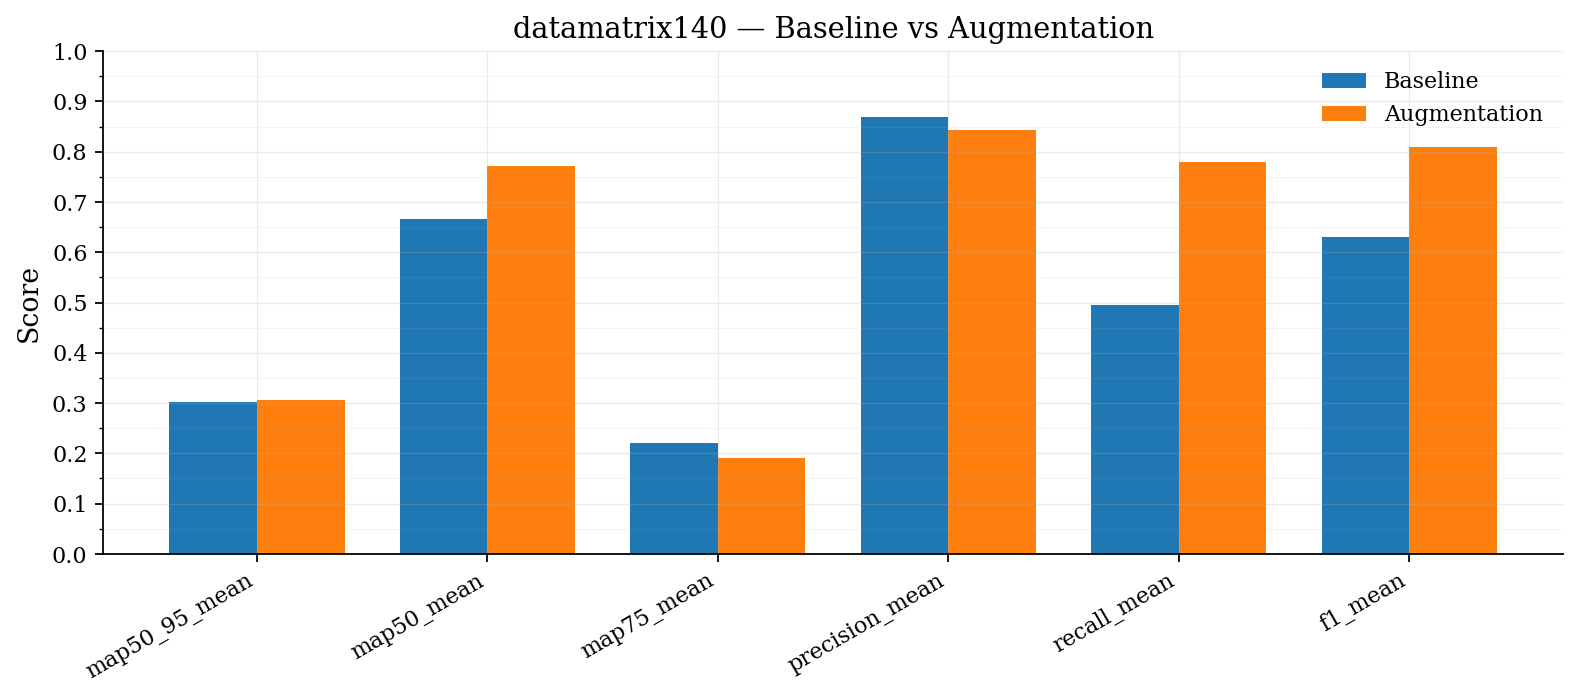

Saved: figures_scientific/per_dataset_datamatrix140.png | figures_scientific/per_dataset_datamatrix140.pdf


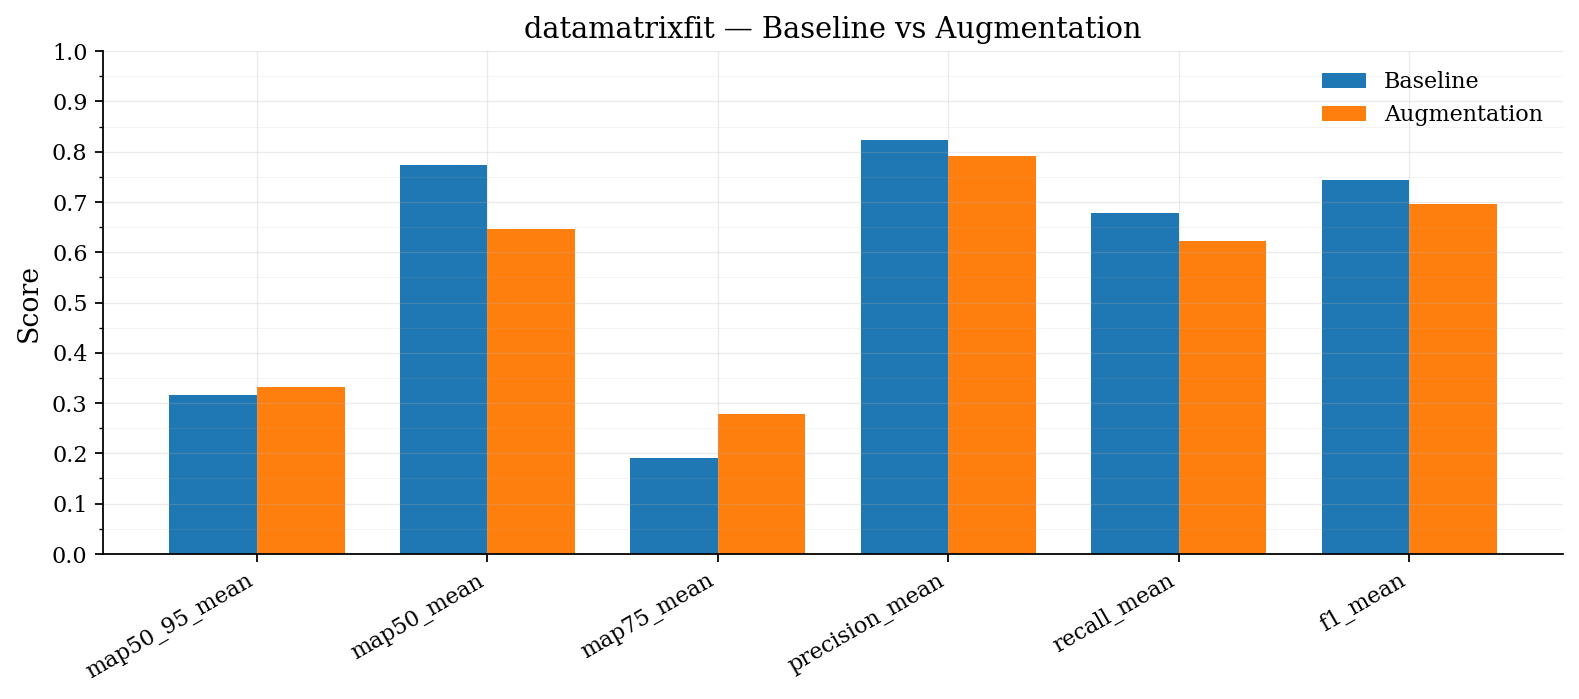

Saved: figures_scientific/per_dataset_datamatrixfit.png | figures_scientific/per_dataset_datamatrixfit.pdf


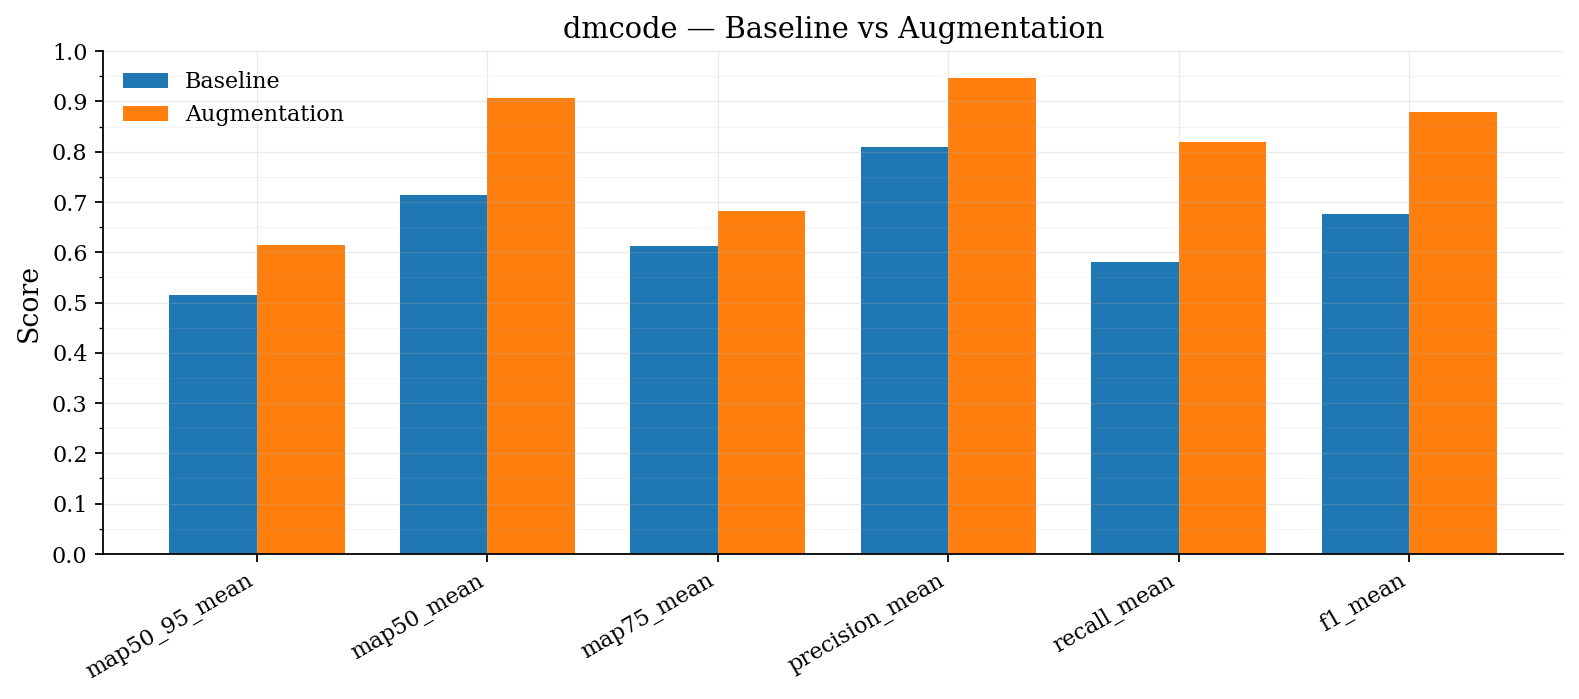

Saved: figures_scientific/per_dataset_dmcode.png | figures_scientific/per_dataset_dmcode.pdf


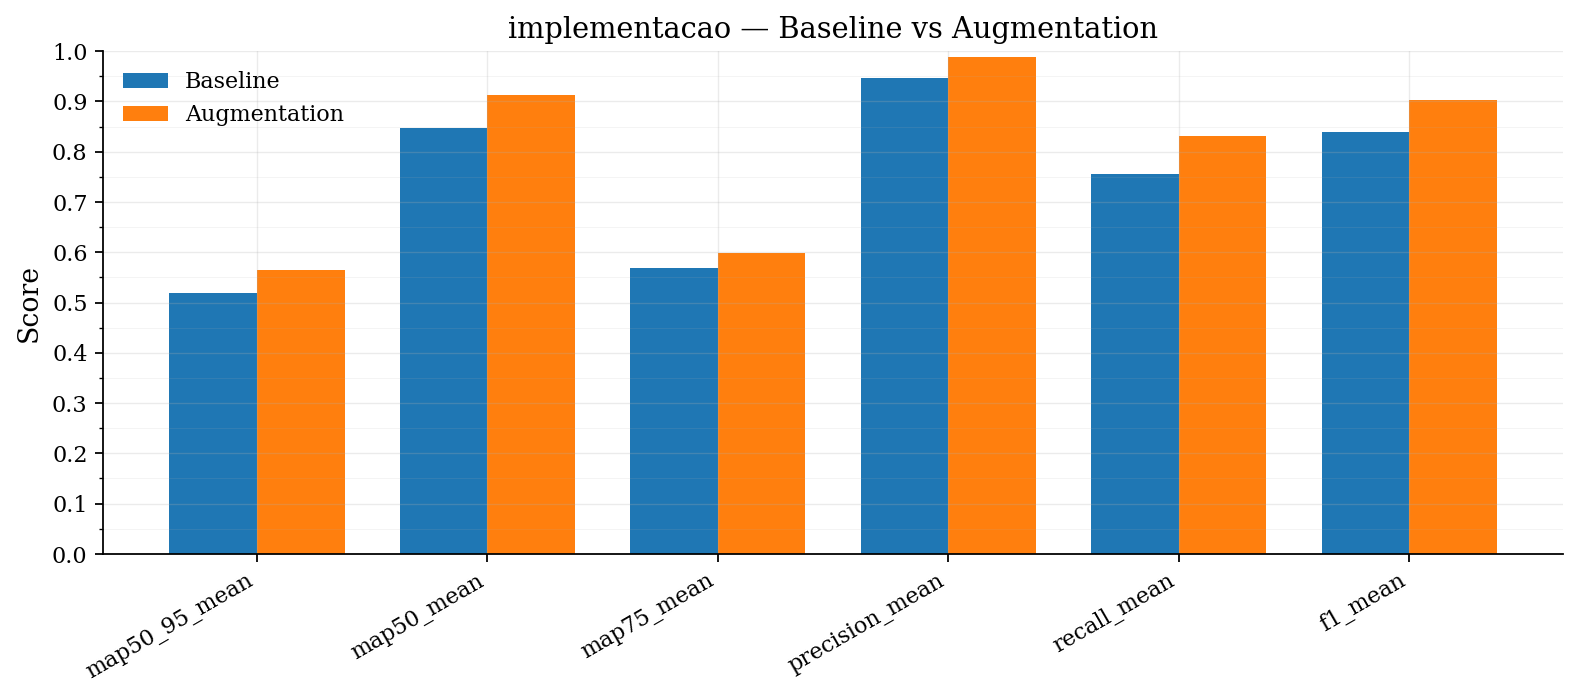

Saved: figures_scientific/per_dataset_implementacao.png | figures_scientific/per_dataset_implementacao.pdf


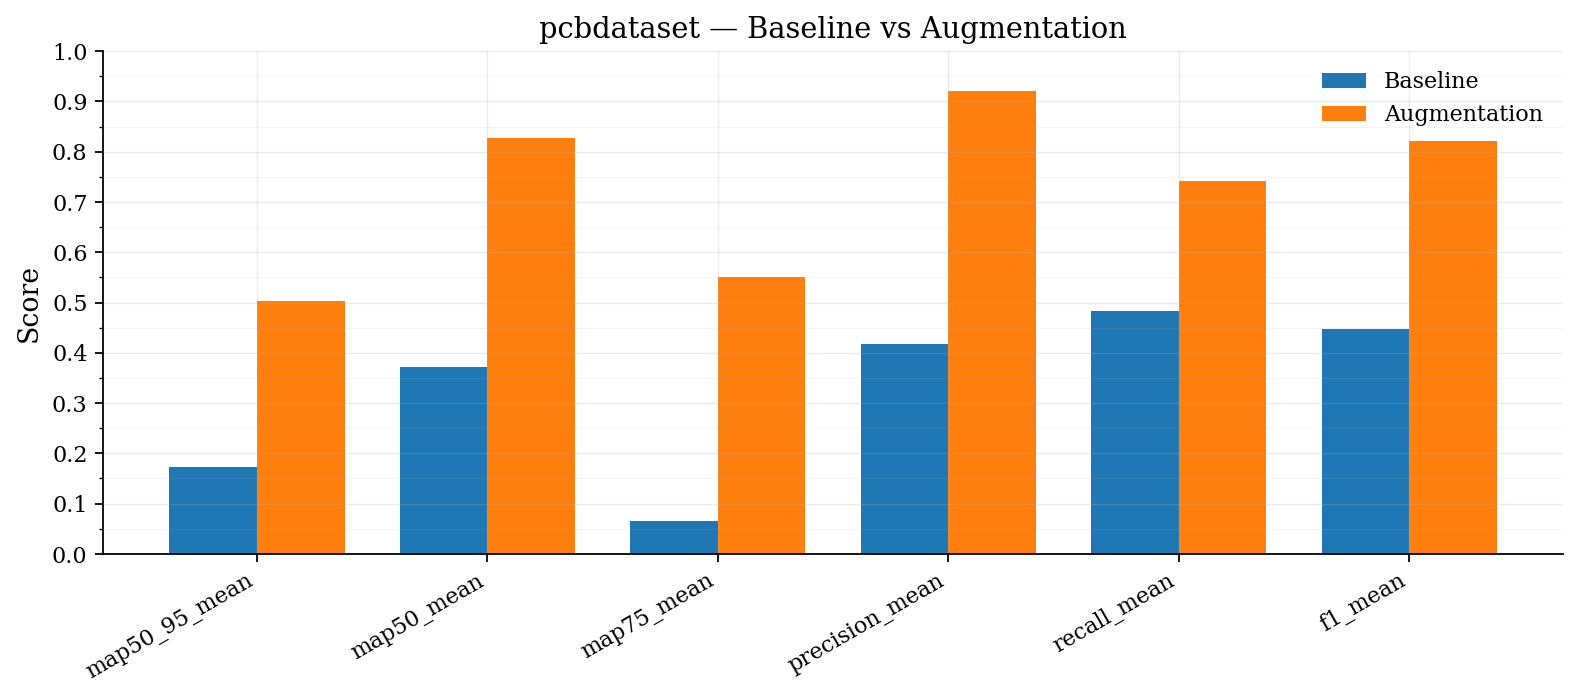

Saved: figures_scientific/per_dataset_pcbdataset.png | figures_scientific/per_dataset_pcbdataset.pdf


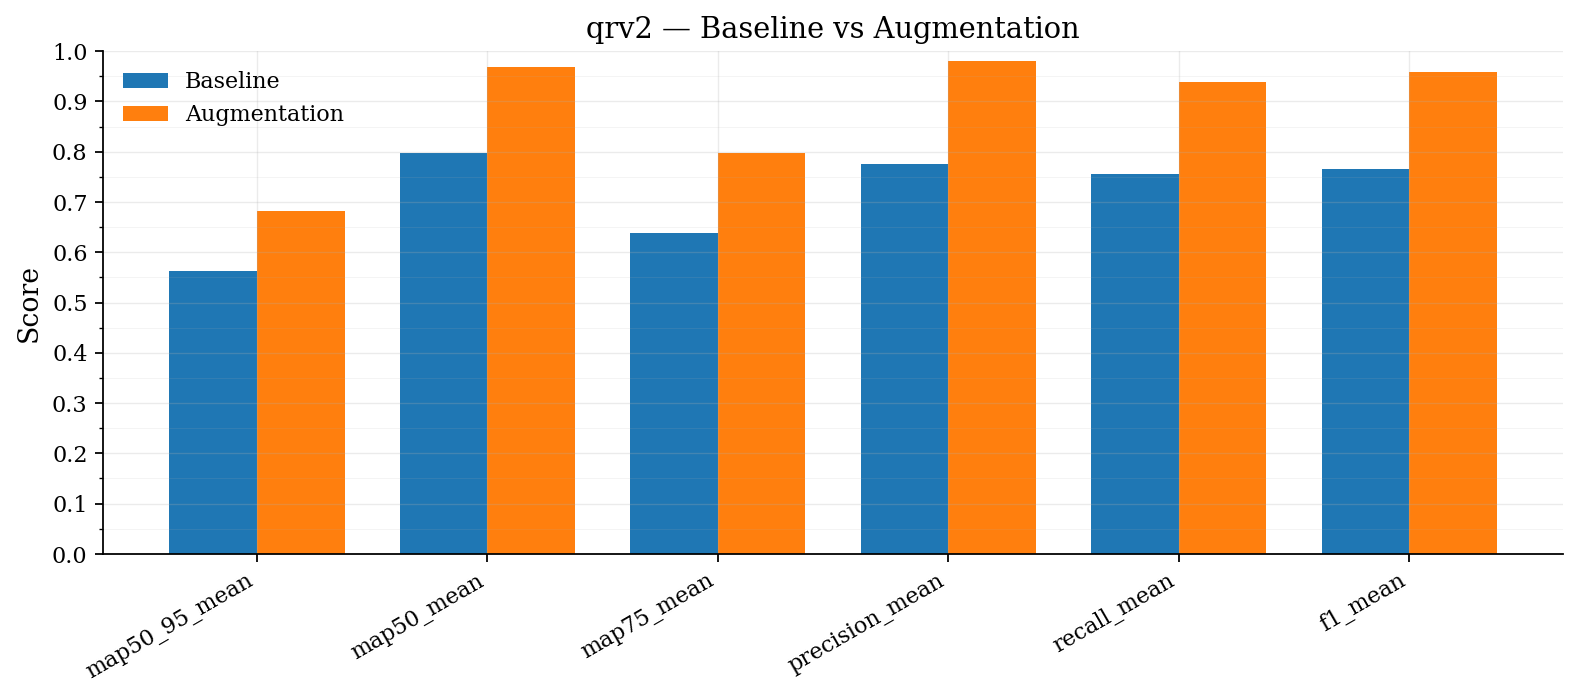

Saved: figures_scientific/per_dataset_qrv2.png | figures_scientific/per_dataset_qrv2.pdf


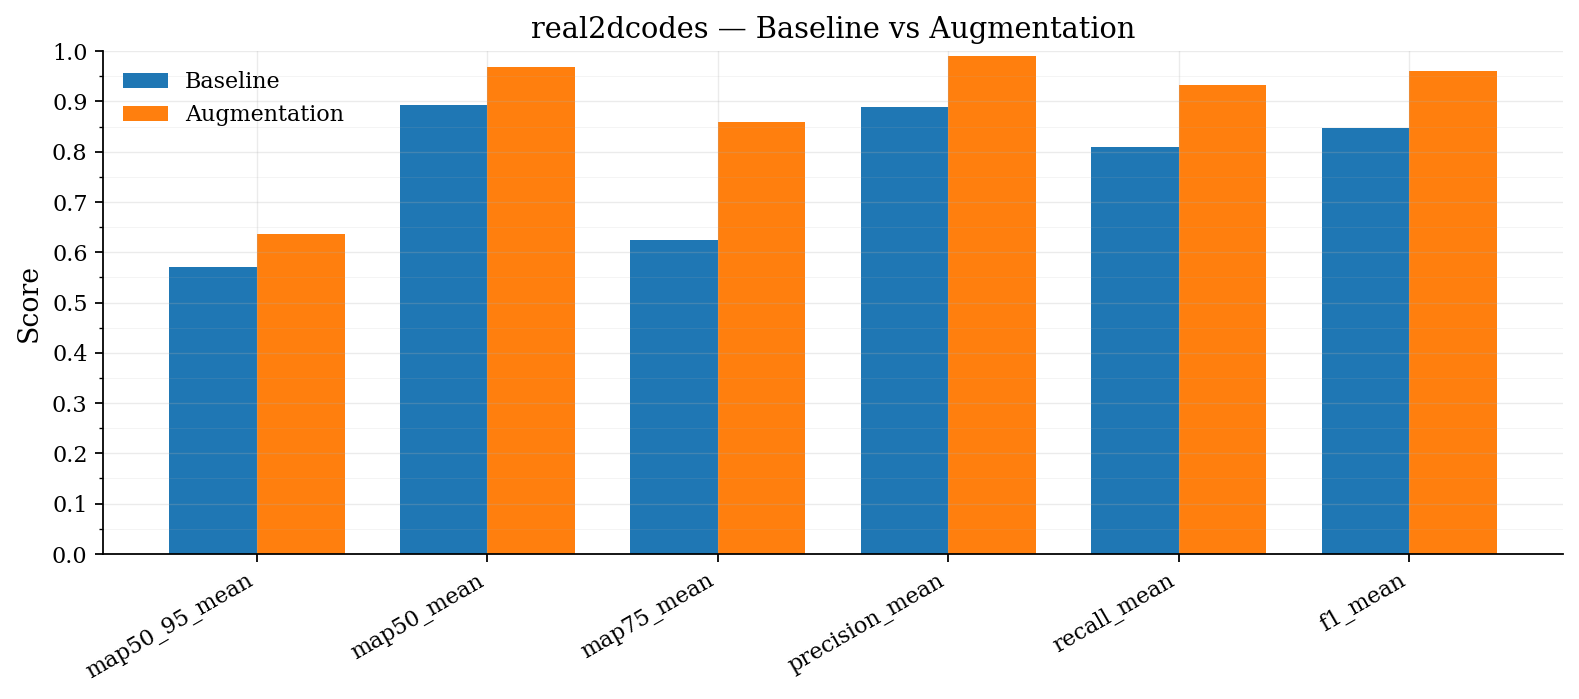

Saved: figures_scientific/per_dataset_real2dcodes.png | figures_scientific/per_dataset_real2dcodes.pdf


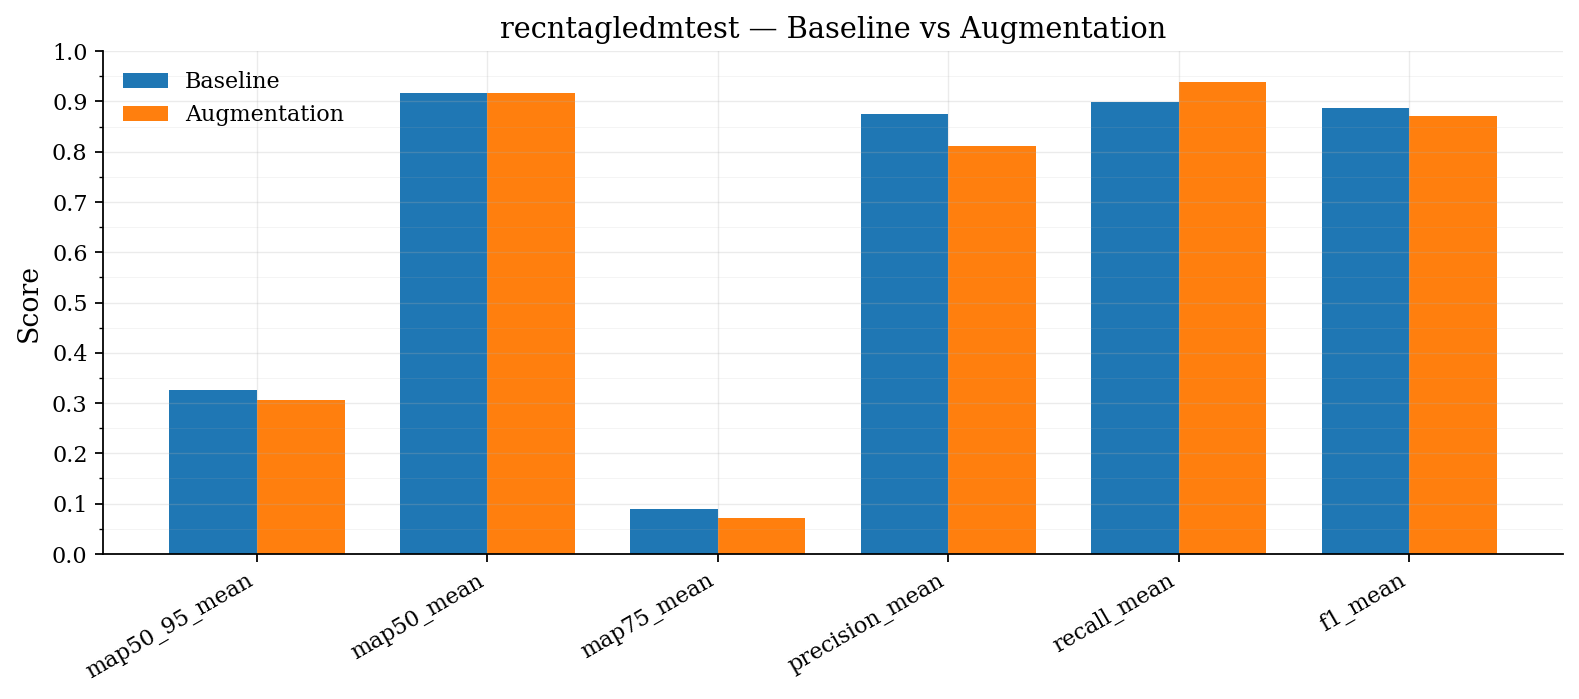

Saved: figures_scientific/per_dataset_recntagledmtest.png | figures_scientific/per_dataset_recntagledmtest.pdf


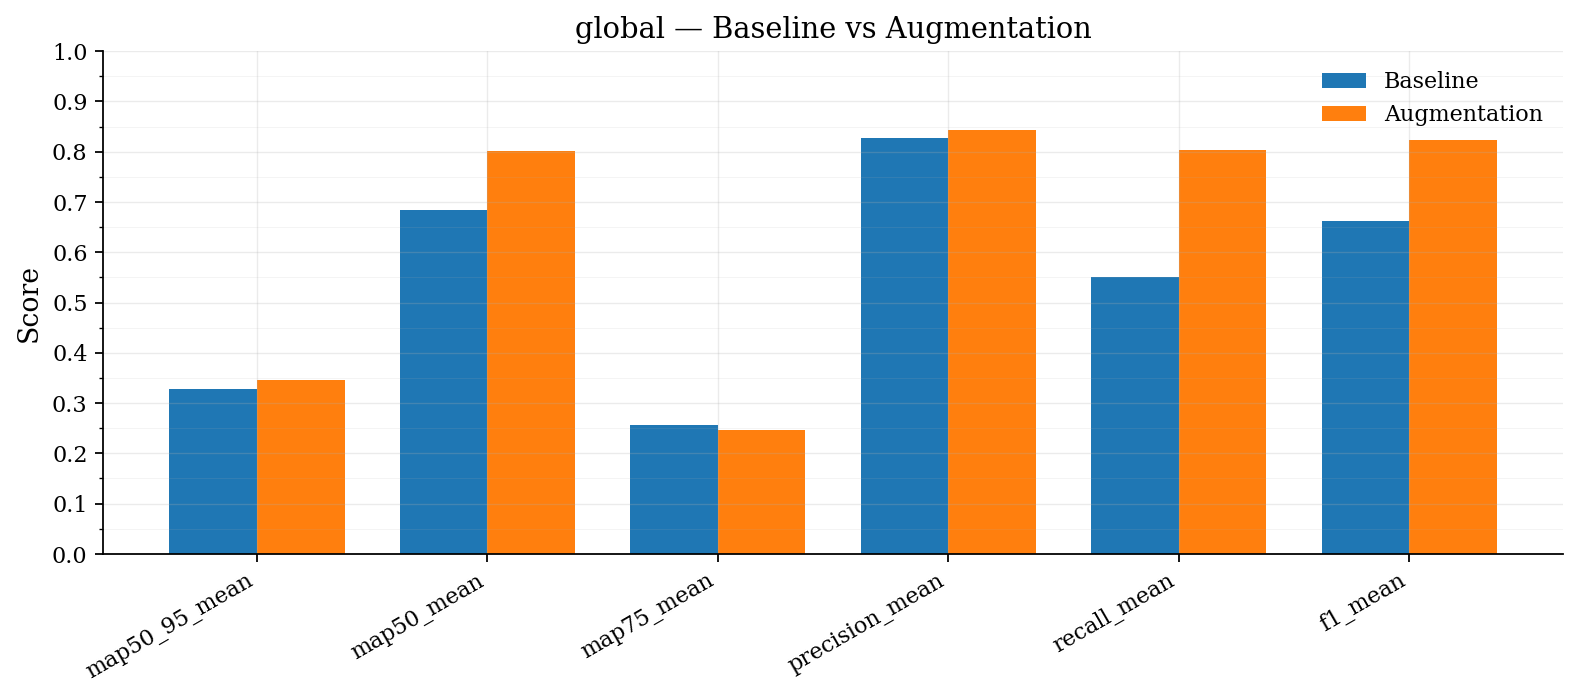

Saved: figures_scientific/per_dataset_global.png | figures_scientific/per_dataset_global.pdf


In [9]:

# === 1) PAR DATASET ===
for _, row in df.iterrows():
    valsA, valsB, errsA, errsB = [], [], [], []
    for m in METRICS:
        vA, eA = errpair(row, m, "A")
        vB, eB = errpair(row, m, "B")
        valsA.append(vA); valsB.append(vB)
        errsA.append(eA); errsB.append(eB)
    errsA = None if all(e is None for e in errsA) else errsA
    errsB = None if all(e is None for e in errsB) else errsB

    fig, ax = plt.subplots(figsize=(10, 4.5))
    ax.set_title(f"{row['short']} — {LABEL_A} vs {LABEL_B}")
    draw_bars_with_optional_error(ax, METRICS, valsA, valsB, errsA, errsB, LABEL_A, LABEL_B)
    setup_axes(ax, ylabel="Score")
    savefig(fig, f"per_dataset_{row['short']}")


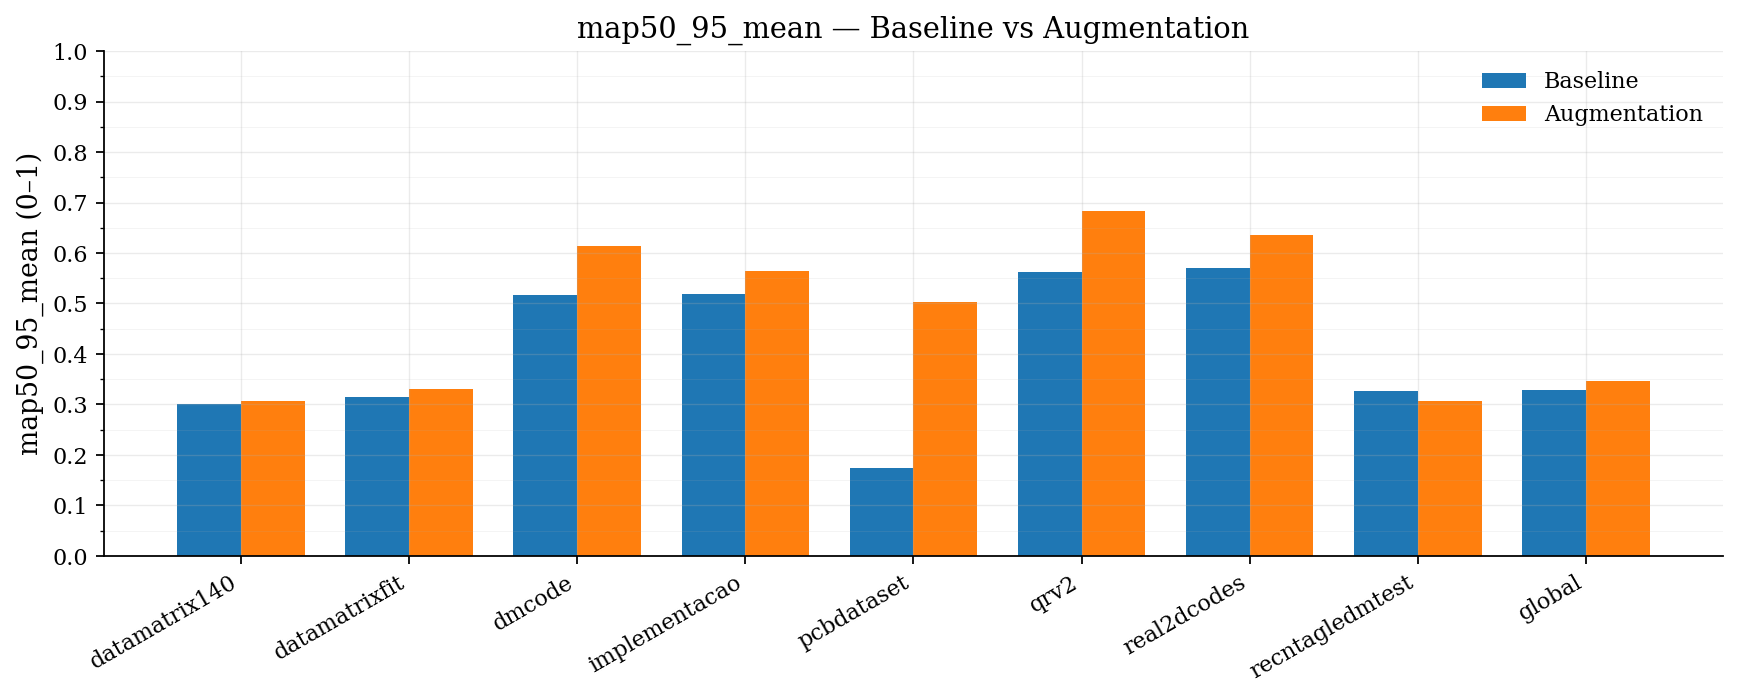

Saved: figures_scientific/per_metric_map50_95_mean.png | figures_scientific/per_metric_map50_95_mean.pdf


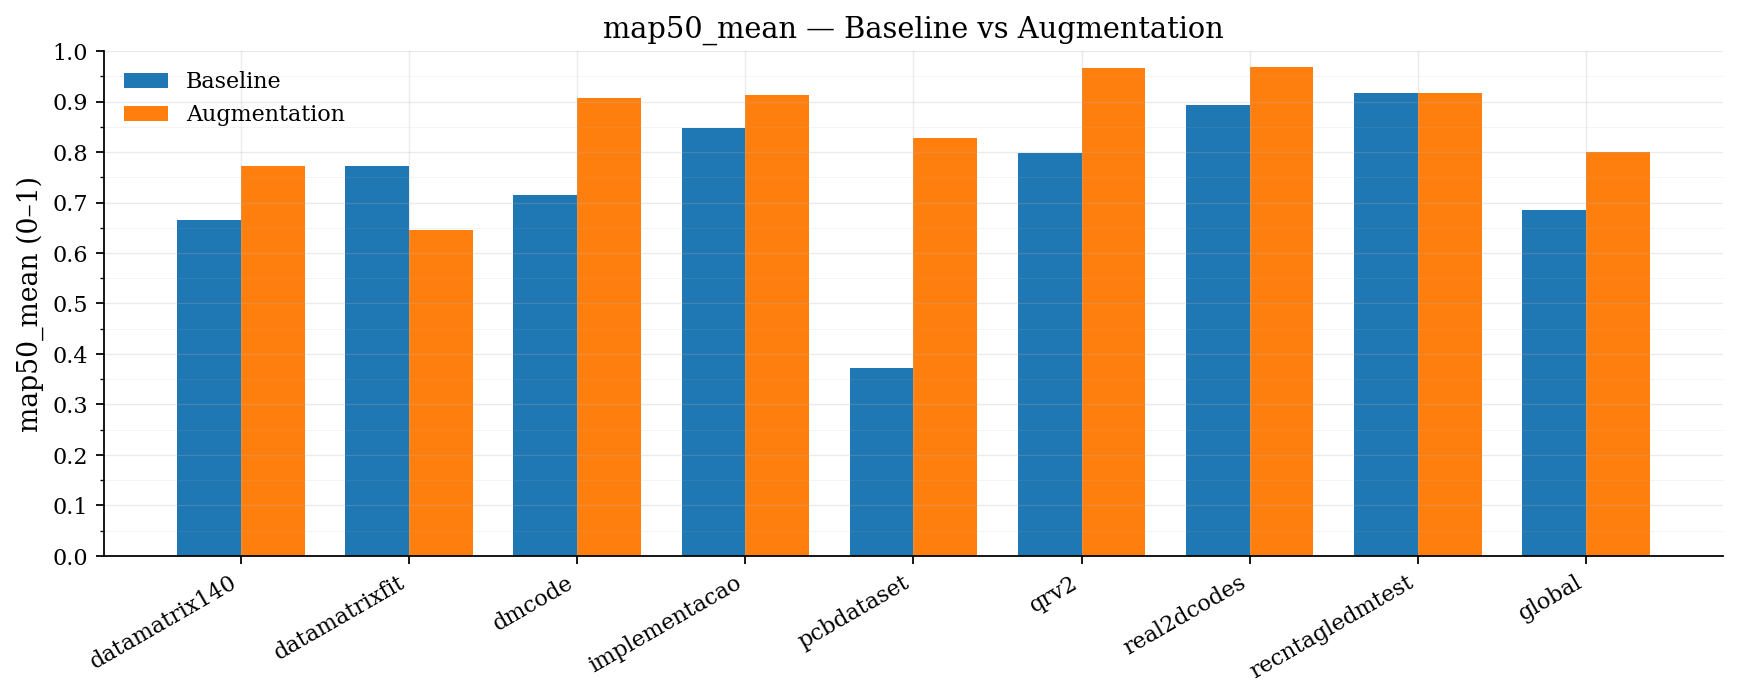

Saved: figures_scientific/per_metric_map50_mean.png | figures_scientific/per_metric_map50_mean.pdf


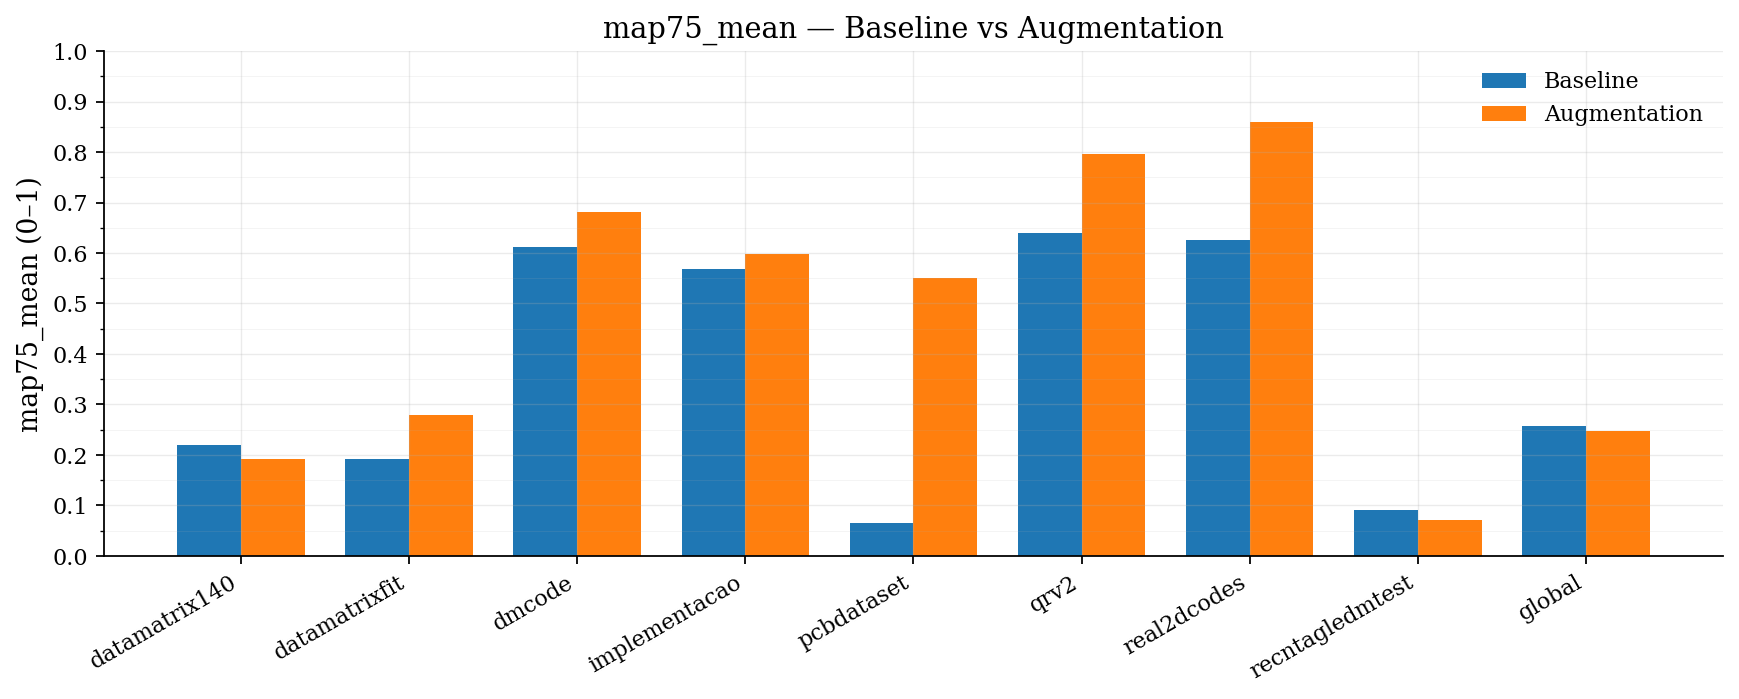

Saved: figures_scientific/per_metric_map75_mean.png | figures_scientific/per_metric_map75_mean.pdf


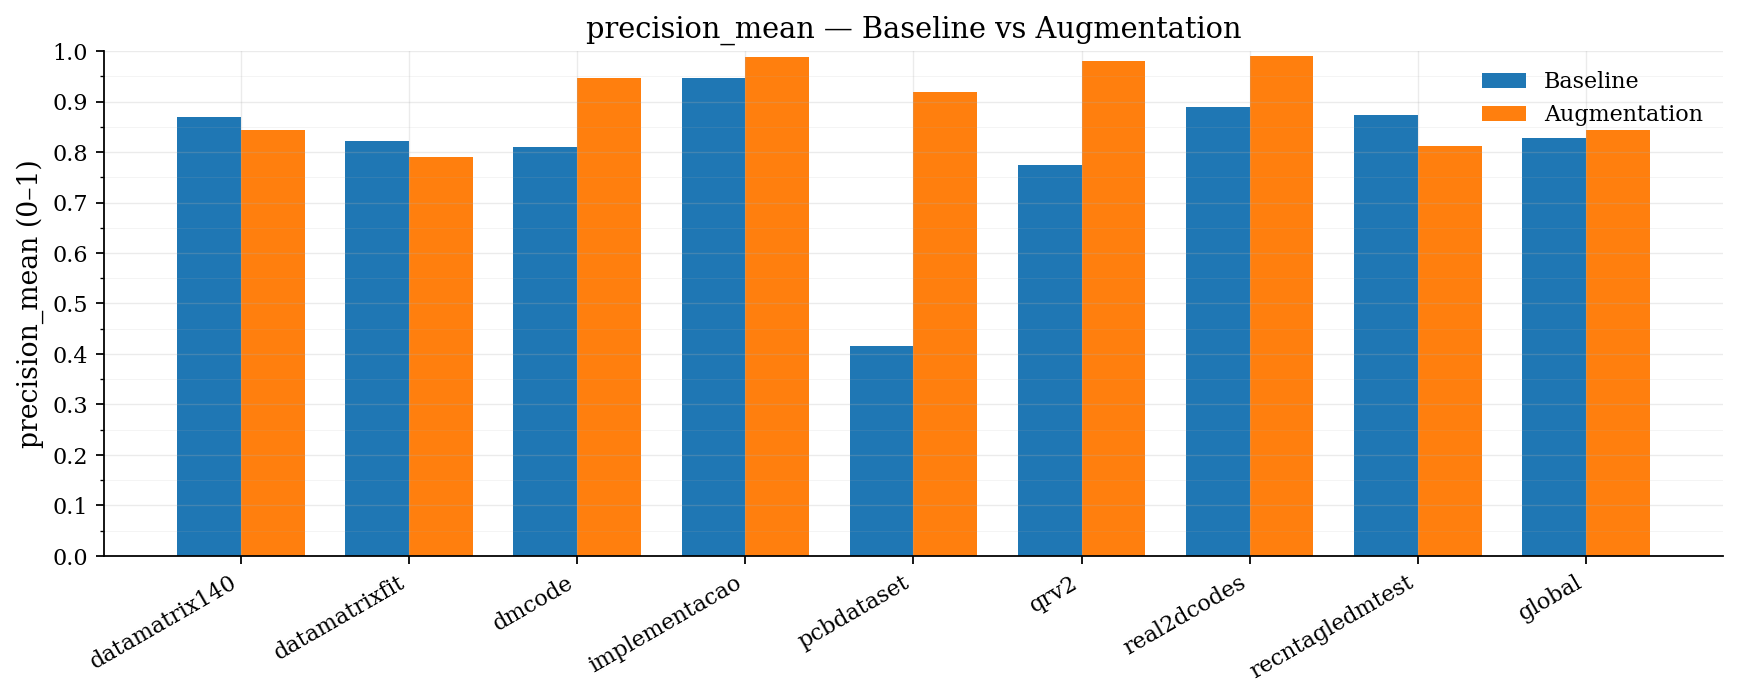

Saved: figures_scientific/per_metric_precision_mean.png | figures_scientific/per_metric_precision_mean.pdf


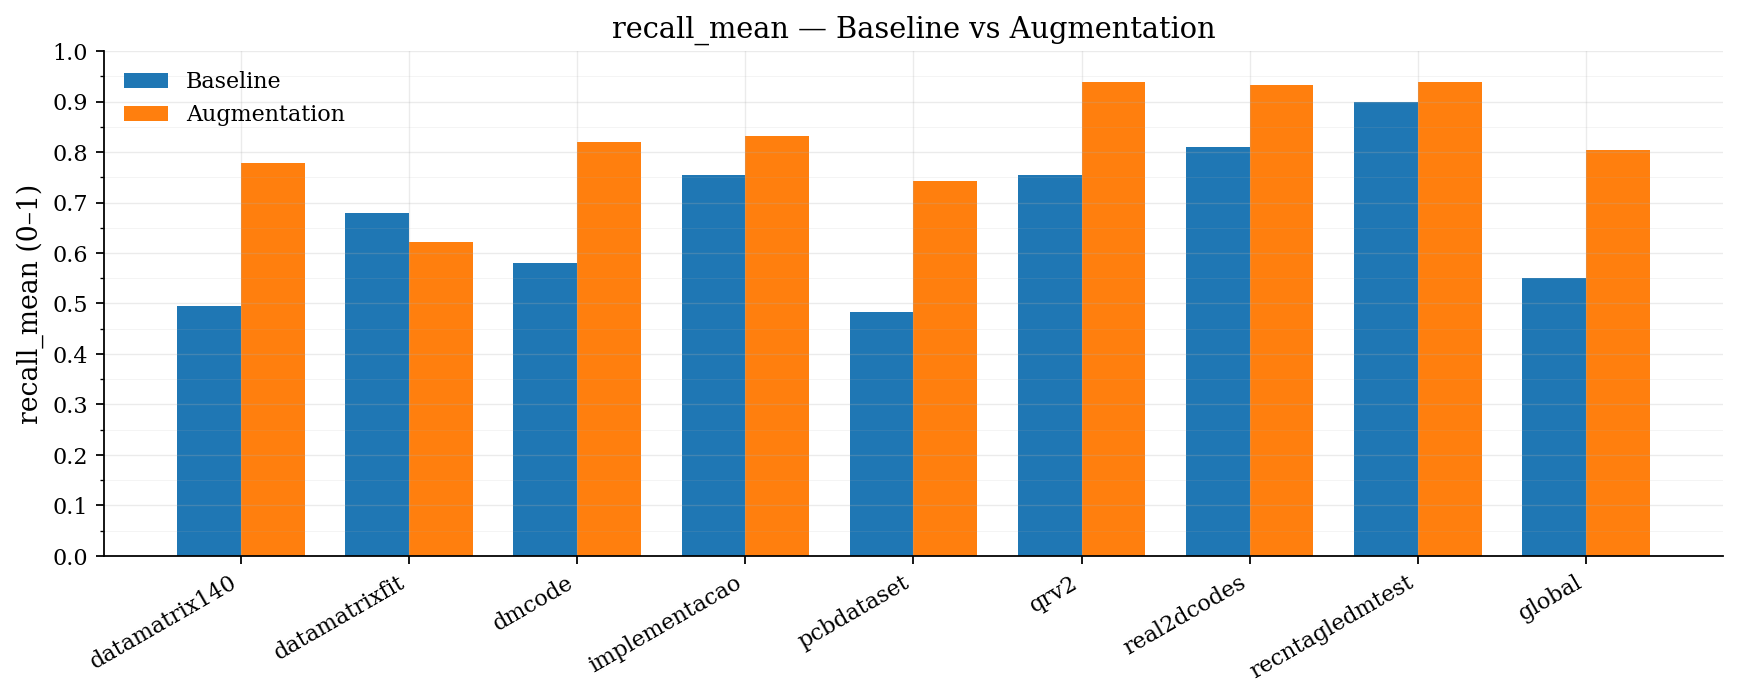

Saved: figures_scientific/per_metric_recall_mean.png | figures_scientific/per_metric_recall_mean.pdf


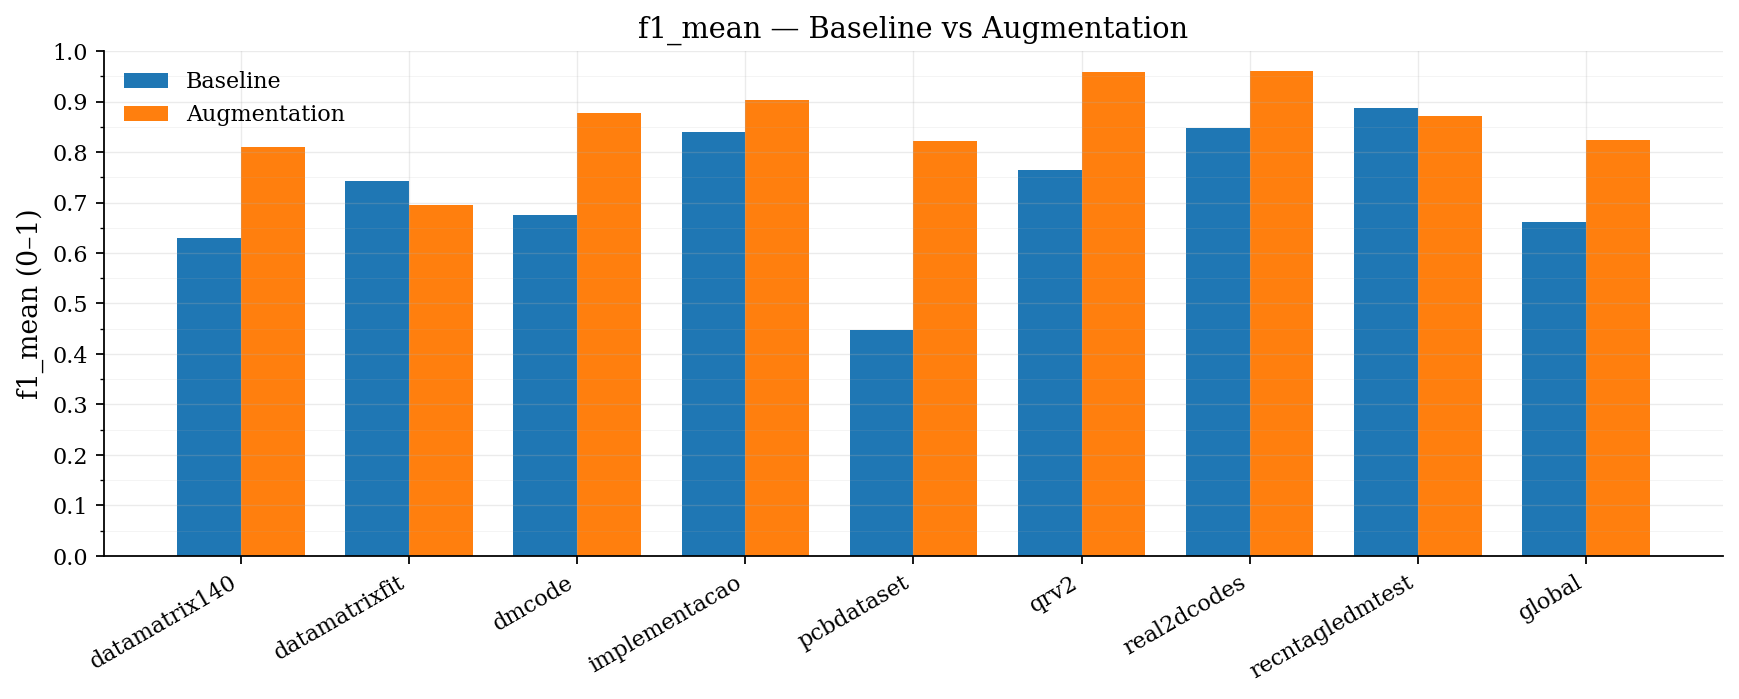

Saved: figures_scientific/per_metric_f1_mean.png | figures_scientific/per_metric_f1_mean.pdf


In [ ]:

# === 2) PAR MÉTRIQUE ===
for m in METRICS:
    valsA, valsB, errsA, errsB = [], [], [], []
    for _, row in df.iterrows():
        vA, eA = errpair(row, m, "A")
        vB, eB = errpair(row, m, "B")
        valsA.append(vA); valsB.append(vB)
        errsA.append(eA); errsB.append(eB)
    errsA = None if all(e is None for e in errsA) else errsA
    errsB = None if all(e is None for e in errsB) else errsB

    fig, ax = plt.subplots(figsize=(11, 4.5))
    ax.set_title(f"{m} — {LABEL_A} vs {LABEL_B}")
    draw_bars_with_optional_error(ax, df['short'].tolist(), valsA, valsB, errsA, errsB, LABEL_A, LABEL_B)
    setup_axes(ax, ylabel=f"{m}")
    savefig(fig, f"per_metric_{m}")


/var/folders/fm/x5x3503x3tj2wz7yd5g_1v_w0000gn/T/ipykernel_12247/3308058383.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['short'].tolist(), rotation=30, ha="right")


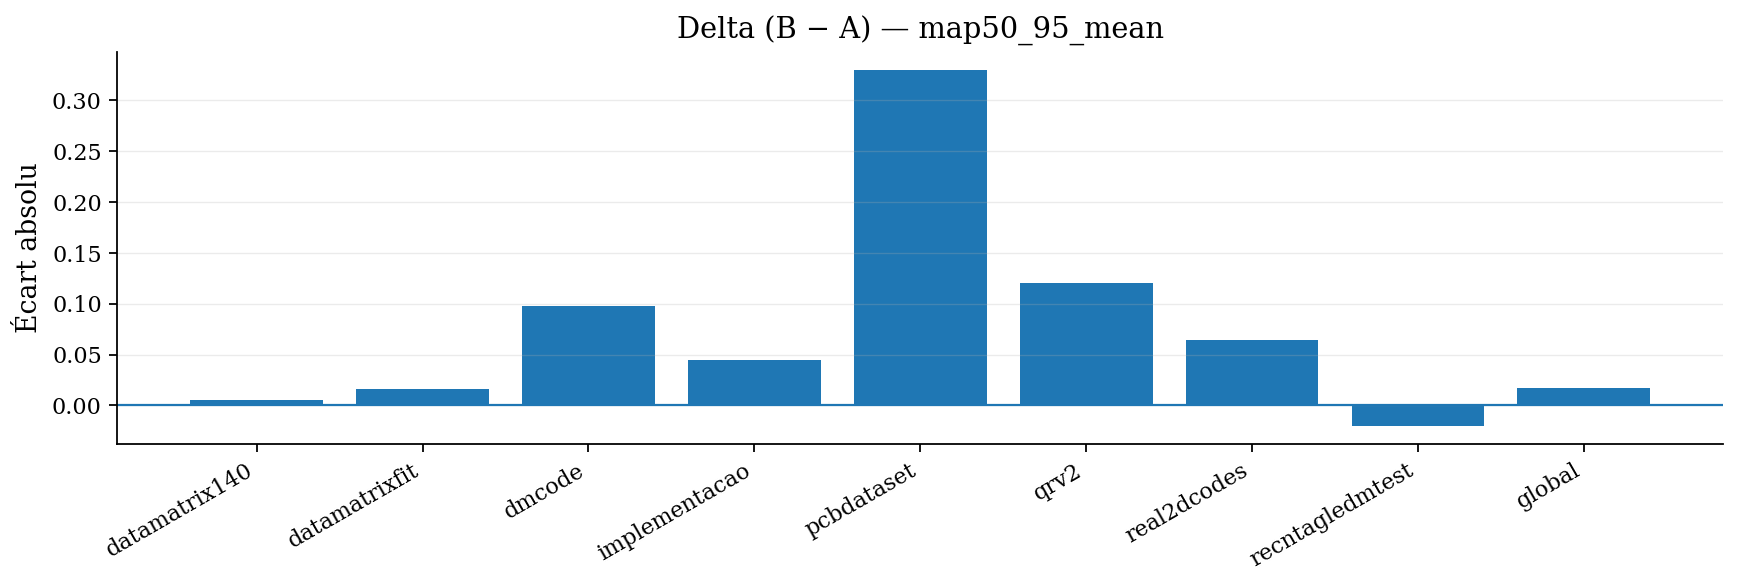

Saved: figures_scientific/delta_map50_95_mean.png | figures_scientific/delta_map50_95_mean.pdf


/var/folders/fm/x5x3503x3tj2wz7yd5g_1v_w0000gn/T/ipykernel_12247/3308058383.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['short'].tolist(), rotation=30, ha="right")


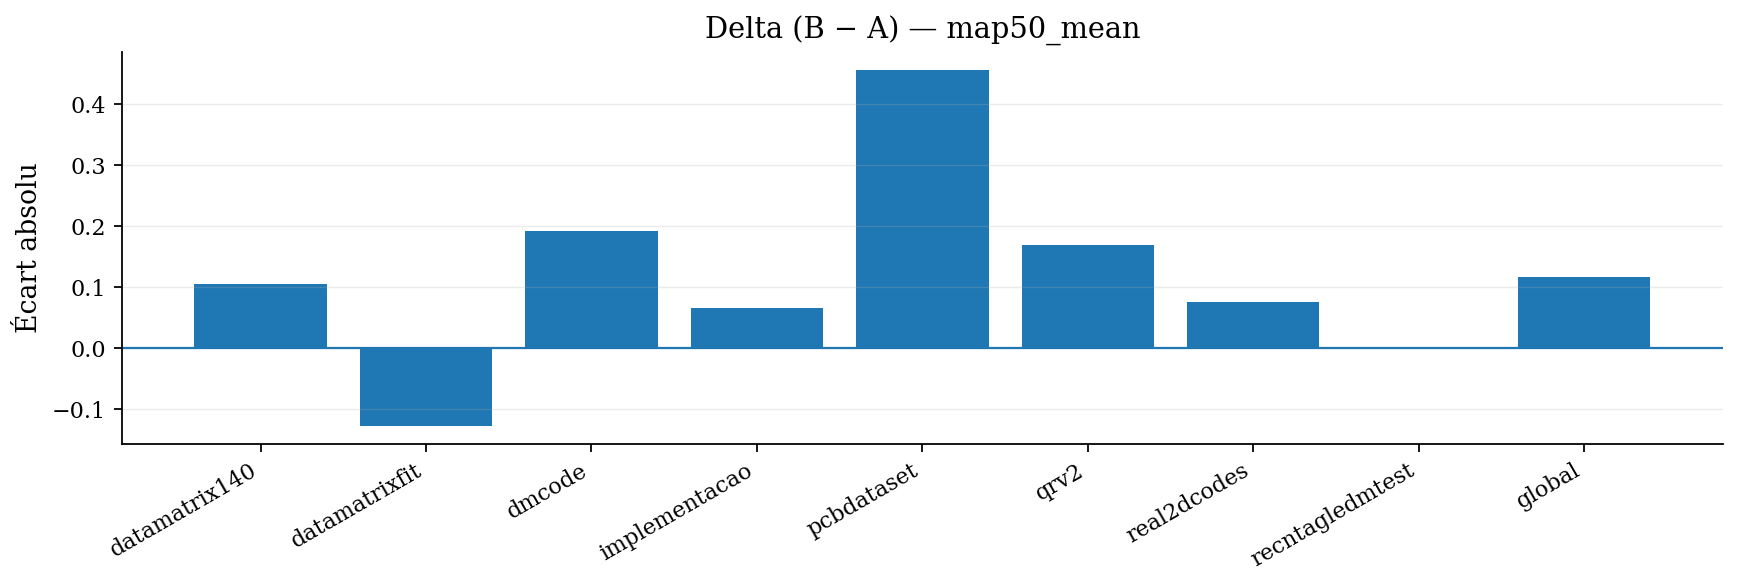

Saved: figures_scientific/delta_map50_mean.png | figures_scientific/delta_map50_mean.pdf


/var/folders/fm/x5x3503x3tj2wz7yd5g_1v_w0000gn/T/ipykernel_12247/3308058383.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['short'].tolist(), rotation=30, ha="right")


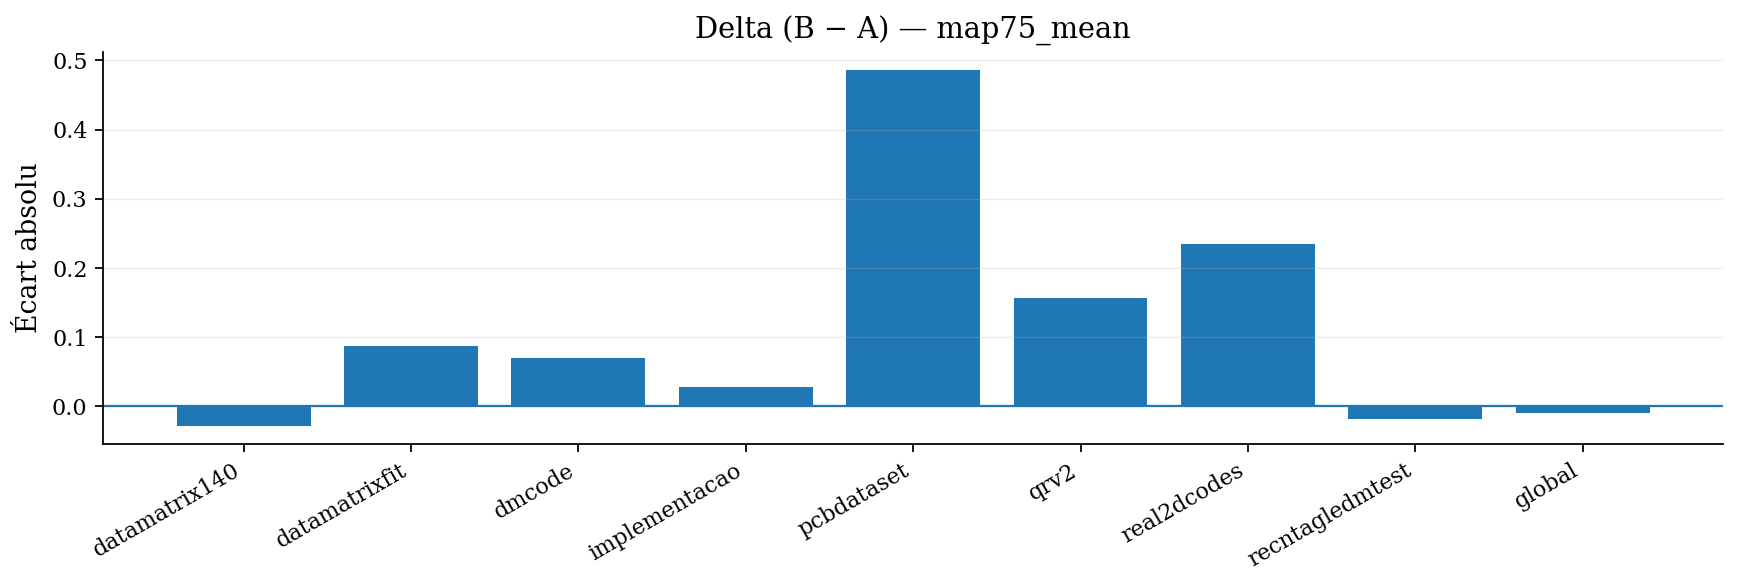

Saved: figures_scientific/delta_map75_mean.png | figures_scientific/delta_map75_mean.pdf


/var/folders/fm/x5x3503x3tj2wz7yd5g_1v_w0000gn/T/ipykernel_12247/3308058383.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['short'].tolist(), rotation=30, ha="right")


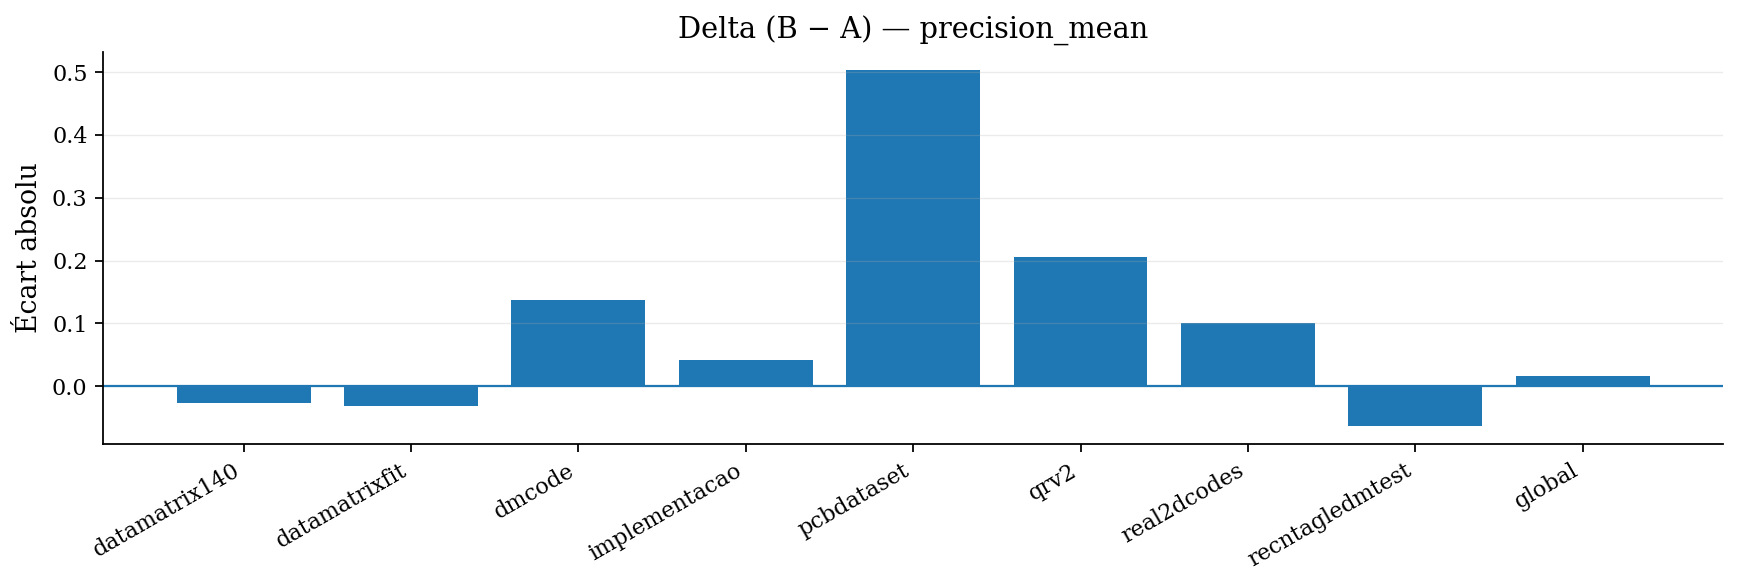

Saved: figures_scientific/delta_precision_mean.png | figures_scientific/delta_precision_mean.pdf


/var/folders/fm/x5x3503x3tj2wz7yd5g_1v_w0000gn/T/ipykernel_12247/3308058383.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['short'].tolist(), rotation=30, ha="right")


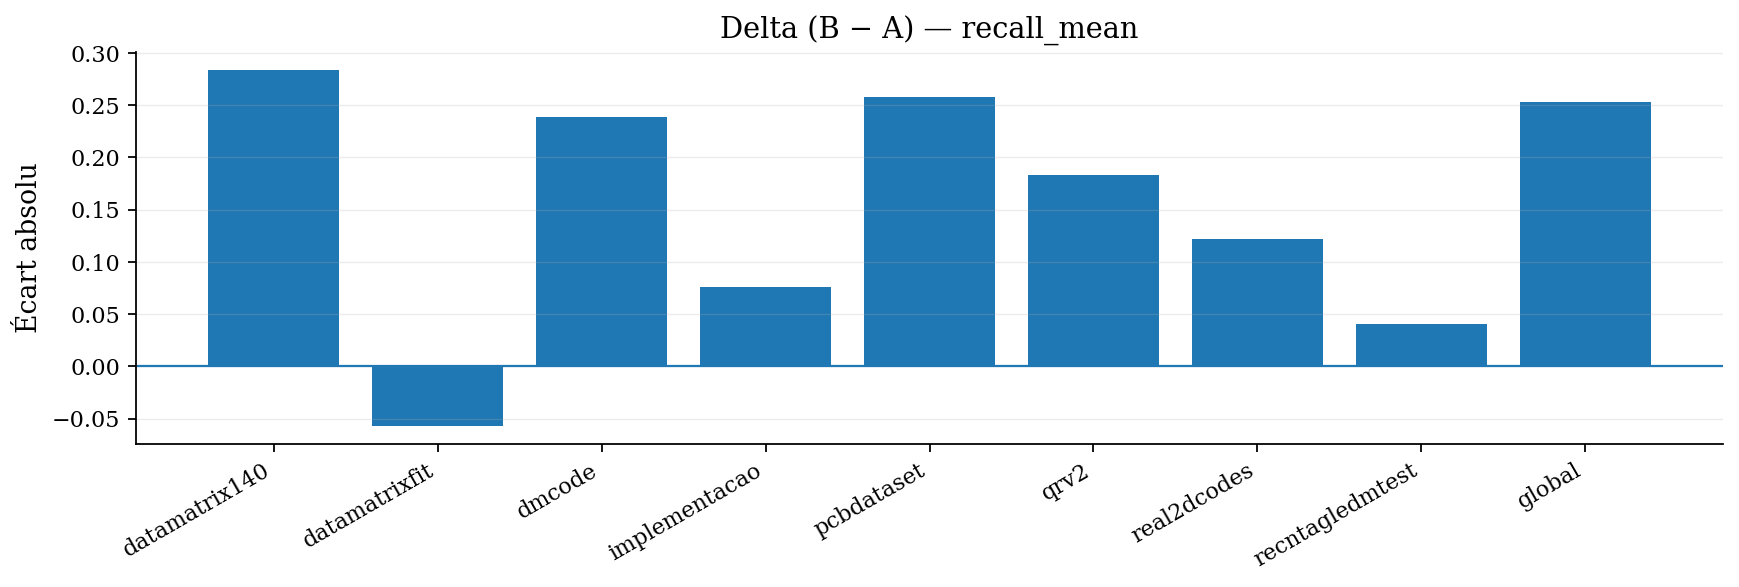

Saved: figures_scientific/delta_recall_mean.png | figures_scientific/delta_recall_mean.pdf


/var/folders/fm/x5x3503x3tj2wz7yd5g_1v_w0000gn/T/ipykernel_12247/3308058383.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['short'].tolist(), rotation=30, ha="right")


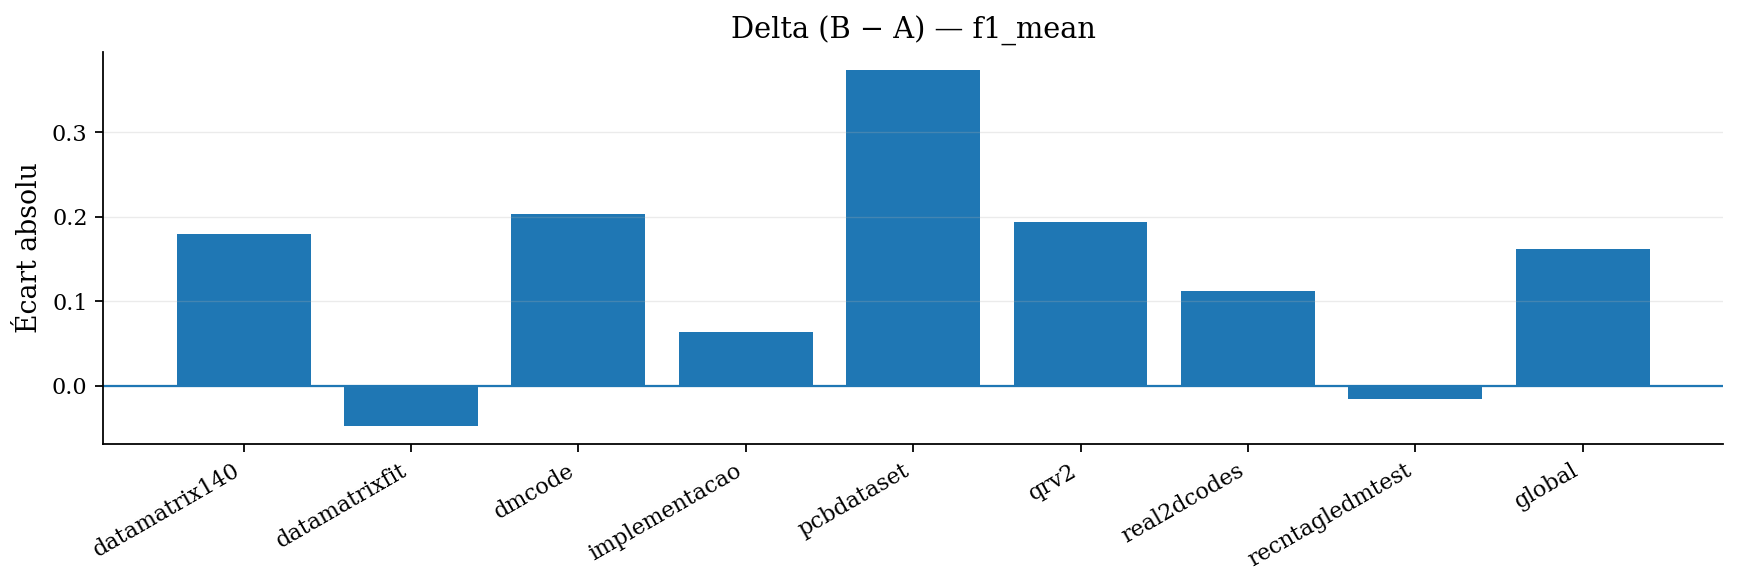

Saved: figures_scientific/delta_f1_mean.png | figures_scientific/delta_f1_mean.pdf


In [11]:

# === 3) DELTAS (B − A) ===
for m in METRICS:
    delta = df[f"{m}_B"].values - df[f"{m}_A"].values
    fig, ax = plt.subplots(figsize=(11, 3.8))
    ax.bar(df['short'].tolist(), delta)
    ax.axhline(0, linewidth=1)
    ax.set_title(f"Delta (B − A) — {m}")
    ax.set_ylabel("Écart absolu")
    ax.set_xticklabels(df['short'].tolist(), rotation=30, ha="right")
    ax.grid(True, axis="y", linewidth=0.6, alpha=0.25)
    savefig(fig, f"delta_{m}")


In [12]:

# === 4) TABLEAUX RÉCAP ===
import pandas as pd, numpy as np
from caas_jupyter_tools import display_dataframe_to_user

summary_rows = []
for m in METRICS:
    A = df[f"{m}_A"].values; B = df[f"{m}_B"].values
    summary_rows.append({
        "metric": m,
        f"{LABEL_A}_mean": float(np.nanmean(A)),
        f"{LABEL_B}_mean": float(np.nanmean(B)),
        "delta_B_minus_A": float(np.nanmean(B - A))
    })
summary = pd.DataFrame(summary_rows).round(4)

display_dataframe_to_user("Résumé global par métrique (scientifique)", summary)
summary_path = Path(OUTDIR) / "summary_global_metrics.csv"
summary.to_csv(summary_path, index=False)
summary_path


ModuleNotFoundError: No module named 'caas_jupyter_tools'